## 🛒 Analytics Task: Store-Level Sales Prediction for OC&Grocery

### 📌 Context
OC&Grocery is a **new client** undergoing a **5-year strategy refresh**. As part of this transformation, they have asked our team at OC&C to help **analyse store-level performance drivers** to support better decision-making.

### 🎯 Objective
The goal is to **predict annual sales at the store level** using provided data on store attributes. These predictions will be used to:

- Improve the **efficiency of the store portfolio**
- Support **strategic expansion** beyond the current store footprint
- Help OC&Grocery **reduce food waste** and enhance **customer satisfaction**

### 📂 Provided Data
You have access to two datasets:
- **Store Data:** Contains various attributes about each store (e.g., location, size, format, etc.)
- **Sales Data:** Provides the **annual sales figures** for each store

> ⚠️ *Not all store attributes will be relevant, part of your task is to determine which features matter most.*

### 🧠 Your Task
1. **Explore and clean** the datasets.
2. **Select relevant features** from the store data.
3. **Train a predictive model** that estimates annual sales for a subset of stores.
4. Evaluate the model's performance and ensure it's suitable for strategic recommendations.

> 📝 **Reminder:** Focus on balancing your time effectively between **Analytics** and **Strategy**. Avoid over-optimizing the model, spend your time wisely.


In [7]:
import os
os.getcwd()

'/Users/marvinschumann/Library/CloudStorage/OneDrive-Personal/Documents/UNI/Nova SBE/03 Semesters/04 T4/OC&C_Hackathon/Colab Notebooks/Team 2'

In [8]:
# Step 1: Install any required packages (if needed)
# Uncomment if packages dont seem to be installed
# !pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Upload files from your local machine
# Make sure to have downloaded them from the Google Drive first!!
#from google.colab import files
# uploaded = files.upload()

# Step 4: Load your CSV files into Pandas DataFrames
# Replace 'store_data.csv' and 'sales_data.csv' with your actual filenames
store_df = pd.read_csv('../../Data/store_data.csv')
sales_df = pd.read_csv('../../Data/sales_data.csv')

# Step 5: Quick look at the data
print("Store data:")
display(store_df.head())

print("\nSales data:")
display(sales_df.head())


Store data:


,store_id,federal_state,store_format,location_type,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,bakery_section,deli_counter,year
0,1,Bavaria,Hypermarket,Urban Residential,6,3920,15741,32.109906,15.188624,14.509256,25,90,5,2566,115,165,2,True,True,2024
1,2,North Rhine-Westphalia,Supermarket,Urban Center,15,1646,8399,44.633713,35.420685,7.841410,22,87,5,6056,106,35,7,True,True,2024
2,3,Saxony,Discounter,Urban Center,7,1231,2447,20.436180,66.443122,8.191310,6,78,5,4441,92,20,1,True,False,2024
3,4,North Rhine-Westphalia,Supermarket,Suburban,12,1704,9069,42.625427,34.803850,7.218120,23,84,1,1294,93,95,0,True,True,2024
4,5,North Rhine-Westphalia,Supermarket,Suburban,15,1296,6714,43.452243,24.802120,12.301529,15,75,3,1594,110,55,4,True,True,2024



Sales data:


,store_id,annual_sales
0,1,36912697
1,2,20121635
2,3,7140552
3,4,18404739
4,5,16994266


# Data Pre-Processing / Cleaning

In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  3000 non-null   int64  
 1   federal_state             3000 non-null   object 
 2   store_format              3000 non-null   object 
 3   location_type             3000 non-null   object 
 4   store_age_years           3000 non-null   int64  
 5   store_area_sqm            3000 non-null   int64  
 6   assortment_count          3000 non-null   int64  
 7   fresh_food_percent        3000 non-null   float64
 8   private_label_percent     3000 non-null   float64
 9   organic_products_percent  3000 non-null   float64
 10  staff_count               3000 non-null   int64  
 11  weekly_opening_hours      3000 non-null   int64  
 12  competitors_nearby        3000 non-null   int64  
 13  population_density        3000 non-null   int64  
 14  avg_inco

In [11]:
store_df.describe()

,store_id,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,year
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0
mean,1611.110333,11.975000,1551.372333,6175.033000,31.470647,40.411797,11.279024,14.137333,79.273333,3.554333,2860.424667,101.404667,50.973333,4.543667,2024.0
std,921.952690,6.773995,889.561789,5028.728703,8.316014,17.310411,5.426194,9.153346,9.574959,1.724347,1728.614398,12.261472,49.056819,4.473116,0.0
min,1.000000,0.000000,321.000000,528.000000,15.001029,10.059507,2.000000,3.000000,60.000000,0.000000,350.000000,70.000000,0.000000,0.000000,2024.0
25%,815.750000,7.000000,978.000000,1980.000000,23.992576,25.646145,6.987832,6.000000,72.000000,2.000000,1427.000000,93.000000,20.000000,0.000000,2024.0
50%,1617.500000,12.000000,1307.000000,3885.000000,30.139165,34.956313,10.465743,11.000000,78.000000,3.000000,2734.500000,102.000000,35.000000,3.000000,2024.0
75%,2409.250000,16.250000,1905.750000,9787.000000,38.990004,57.602183,14.878791,21.000000,84.000000,5.000000,3972.250000,110.000000,65.000000,8.000000,2024.0
max,3200.000000,30.000000,5470.000000,26879.000000,44.966530,69.996186,31.415520,49.000000,110.000000,7.000000,6499.000000,131.000000,340.000000,15.000000,2024.0


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_id      3000 non-null   int64
 1   annual_sales  3000 non-null   int64
dtypes: int64(2)
memory usage: 47.0 KB


In [13]:
sales_df.describe()

,store_id,annual_sales
count,3000.000000,3.000000e+03
mean,1611.110333,1.666832e+07
std,921.952690,1.057503e+07
min,1.000000,1.144618e+06
25%,815.750000,1.104478e+07
50%,1617.500000,1.459208e+07
75%,2409.250000,1.989197e+07
max,3200.000000,7.849110e+07


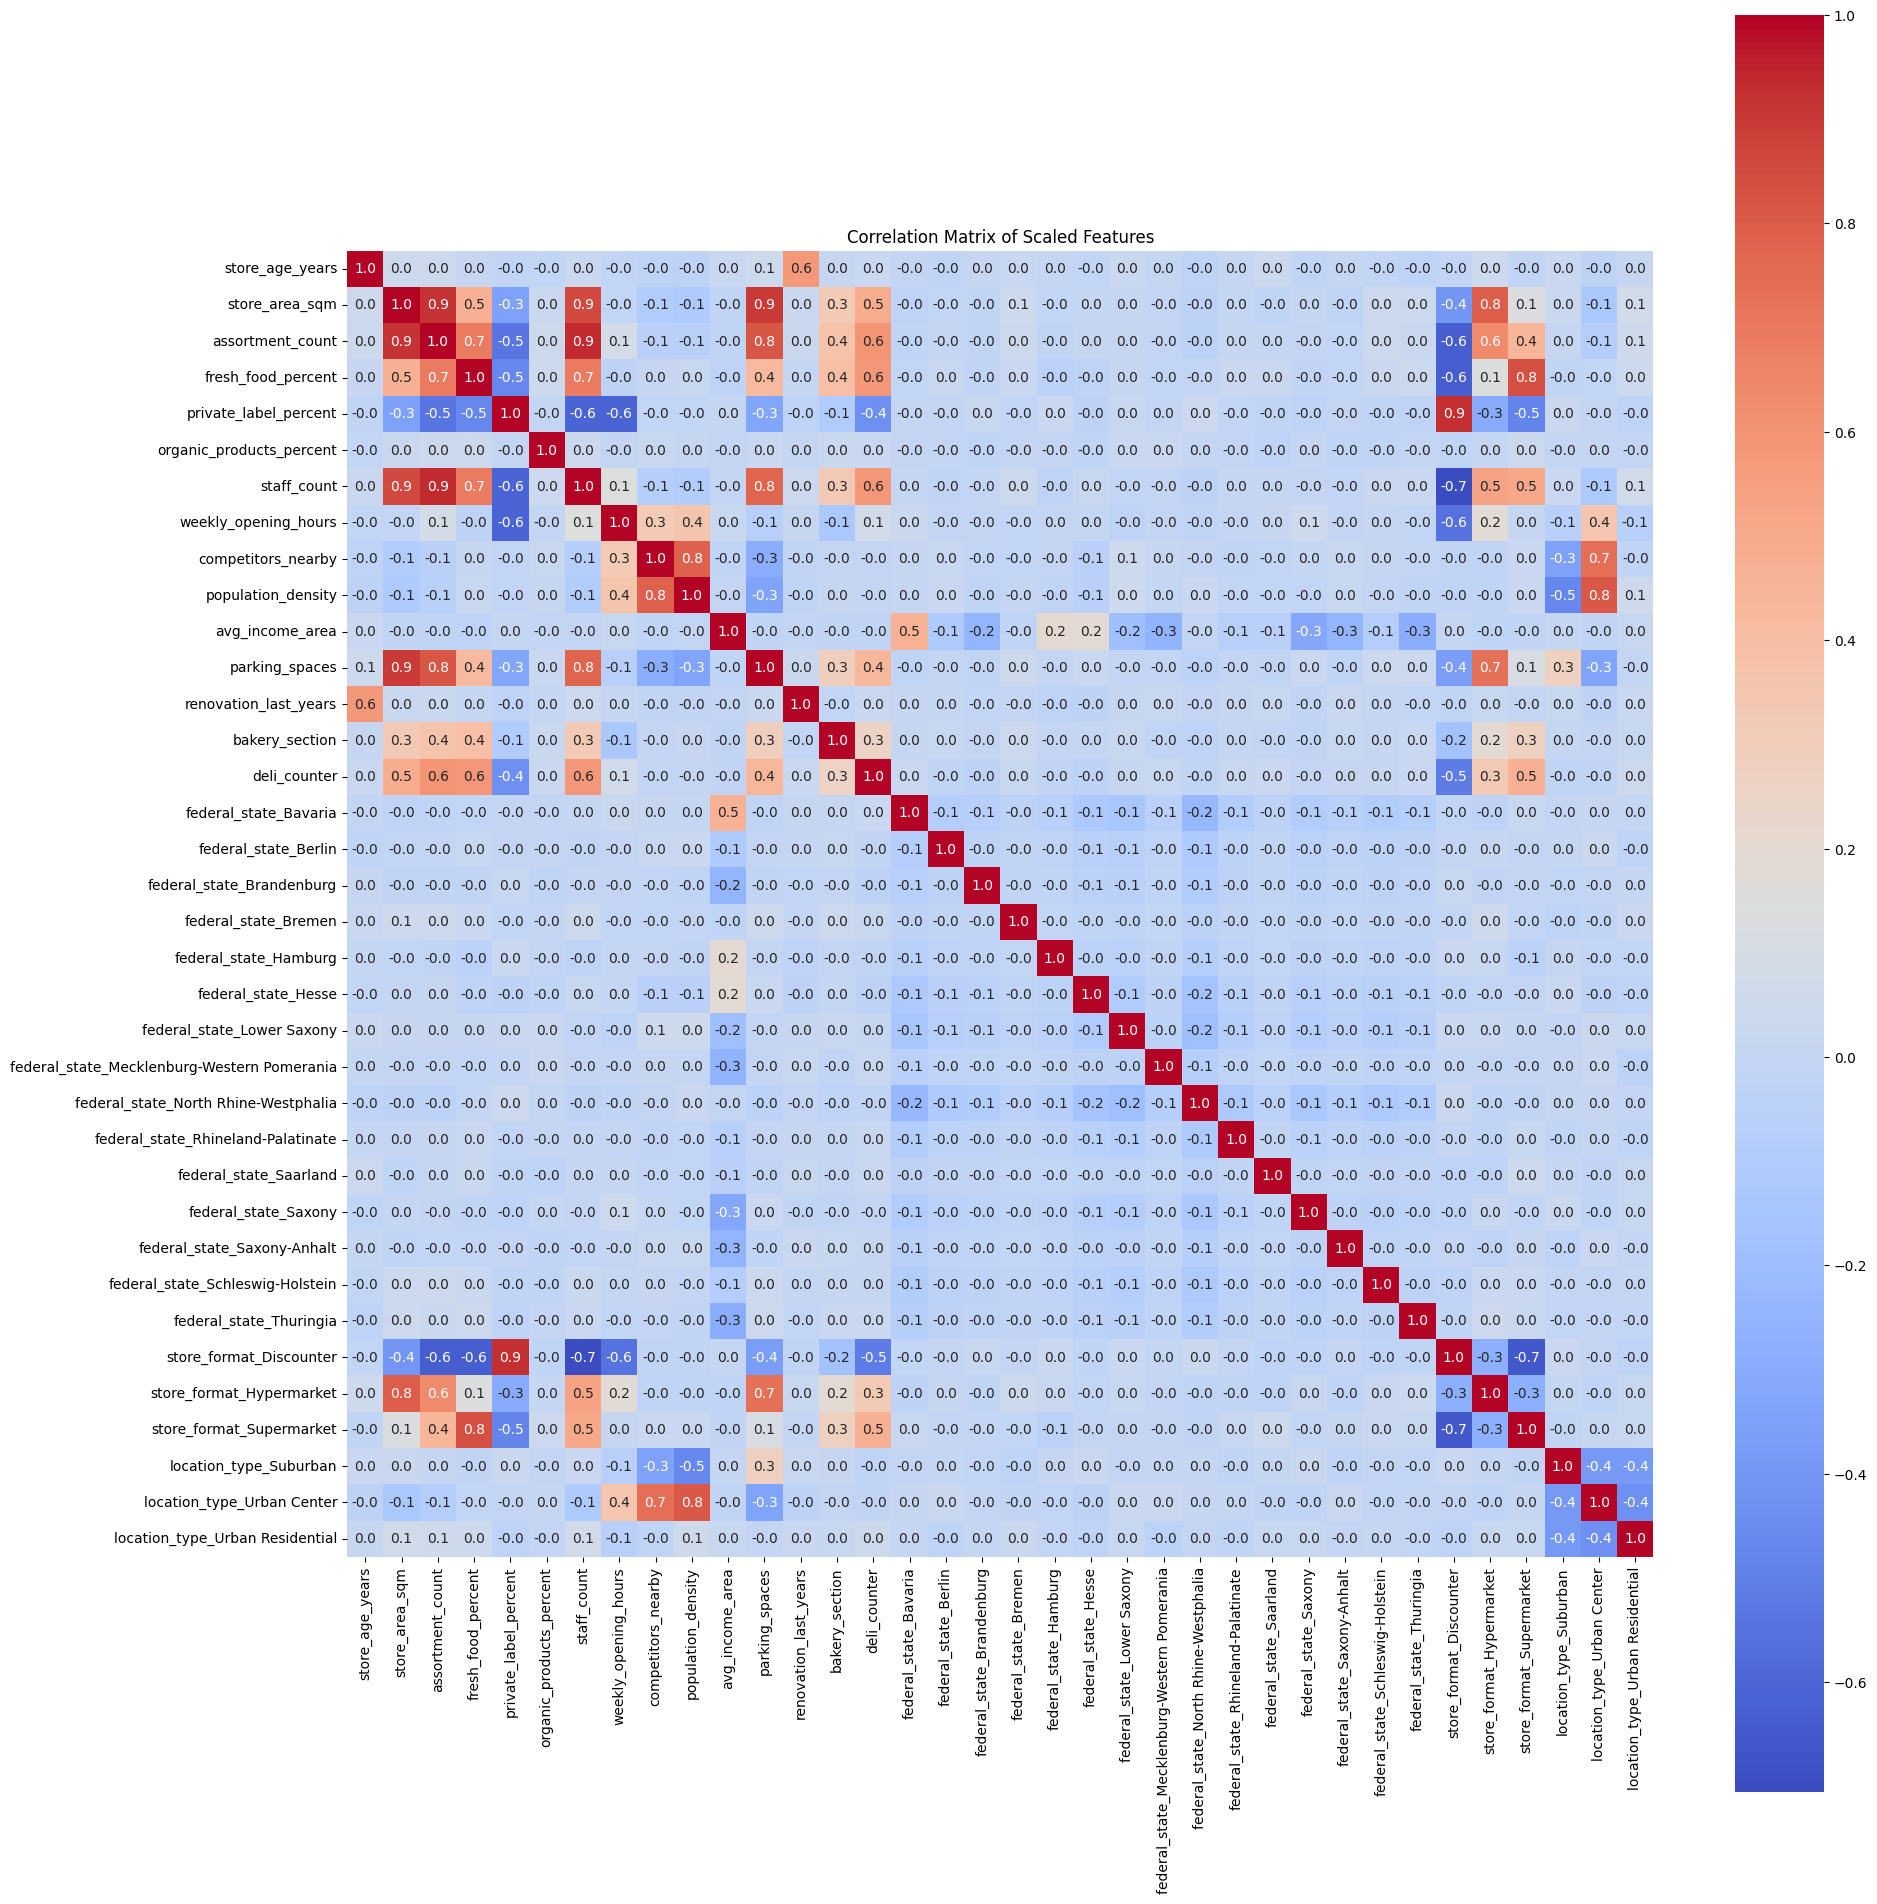

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert scaled data into DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Step 2: Calculate the correlation matrix
corr_matrix = X_train_scaled_df.corr()

# Step 3: Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', cbar=True, square=True)
plt.title("Correlation Matrix of Scaled Features")
plt.tight_layout()
plt.show()


In [19]:
# Step 1: Merge and preprocess
df = pd.merge(store_df, sales_df, on='store_id')
print("Merged data shape:", df.shape)

df = df.drop(columns=['store_id', 'year'])

# Step 2: One-hot encode categorical columns
categorical_cols = ['federal_state', 'store_format', 'location_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Split into features and target
X = df.drop(columns=['annual_sales'])
y = df['annual_sales']

# Step 4: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred_lr = lr_model.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Compatibility with older sklearn
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:,.0f}")
print(f"Linear Regression R² Score: {r2_lr:.3f}")

Merged data shape: (3000, 21)
Linear Regression RMSE: 13,219,761
Linear Regression R² Score: 0.162


In [26]:
# Step 8: Coefficient interpretation
import pandas as pd

coefficients = pd.Series(lr_model.coef_, index=X.columns)

print("\nTop 10 Positive Drivers of Sales:")
display(coefficients.sort_values(ascending=False).head(20))

print("\nTop 10 Negative Drivers of Sales:")
display(coefficients.sort_values().head(20))



Top 10 Positive Drivers of Sales:


store_format_Hypermarket           7.611078e+06
store_format_Supermarket           5.801567e+06
store_format_Discounter            3.699674e+06
store_area_sqm                     3.038873e+06
location_type_Urban Center         1.584137e+06
location_type_Urban Residential    1.240031e+06
location_type_Suburban             8.594902e+05
deli_counter                       4.388538e+05
organic_products_percent           3.996036e+05
avg_income_area                    3.345932e+05
private_label_percent              3.146430e+05
weekly_opening_hours               3.109561e+05
bakery_section                     2.736490e+05
staff_count                        2.654766e+05
fresh_food_percent                 1.711556e+05
federal_state_Bavaria              3.207072e+04
population_density                 2.928930e+04
federal_state_Hamburg              1.032143e+04
federal_state_Bremen              -1.835261e+04
federal_state_Saarland            -1.442022e+05
dtype: float64


Top 10 Negative Drivers of Sales:


competitors_nearby                            -1.153411e+06
federal_state_Lower Saxony                    -7.482994e+05
federal_state_Saxony                          -6.730062e+05
federal_state_Thuringia                       -6.176444e+05
renovation_last_years                         -5.928185e+05
federal_state_North Rhine-Westphalia          -5.774543e+05
federal_state_Mecklenburg-Western Pomerania   -4.898829e+05
federal_state_Schleswig-Holstein              -4.764829e+05
federal_state_Brandenburg                     -4.469842e+05
assortment_count                              -4.271137e+05
federal_state_Saxony-Anhalt                   -3.997388e+05
federal_state_Rhineland-Palatinate            -3.794387e+05
federal_state_Berlin                          -3.046755e+05
parking_spaces                                -2.927728e+05
store_age_years                               -1.873785e+05
federal_state_Hesse                           -1.653401e+05
federal_state_Saarland                  